## **Dog breed predicton**

  **1. Data**

  *   It consists of a training set and a test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs.
  *   The goal of the notebook is to create a classifier capable of determining a dog's breed from a photo.
  *   Refer link : https://www.kaggle.com/c/dog-breed-identification/data   


**2. Evaluation**

*   It is evaluated on Multi Class Log Loss between the predicted probability and the observed target.
*   Refer link :  https://www.kaggle.com/c/dog-breed-identification/overview/evaluation














In [ ]:
import tensorflow as tf 
print(tf.__version__)
import tensorflow_hub as hub 
print(hub.__version__)

2.7.0
0.12.0


In [ ]:
print("GPU available" if tf.config.list_physical_devices("GPU") else "GPU not available")

GPU available


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
labels_csv = pd.read_csv("drive/MyDrive/dog-breed-identification/labels.csv")

NameError: ignored

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


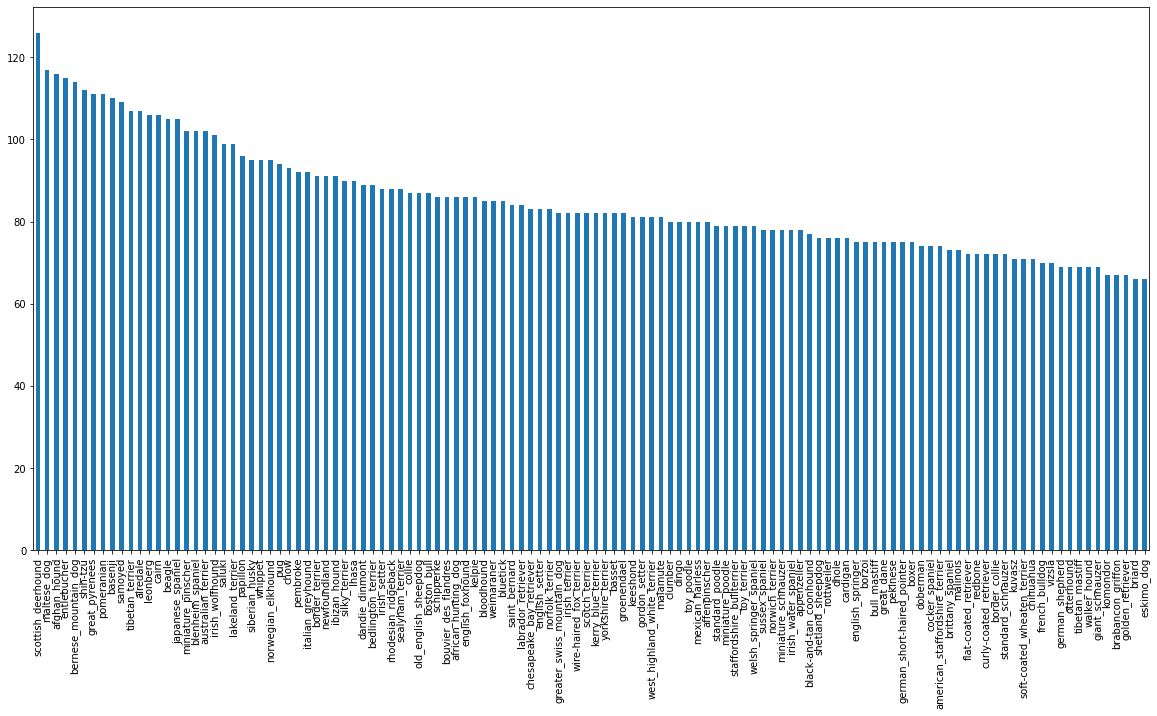

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20,10))

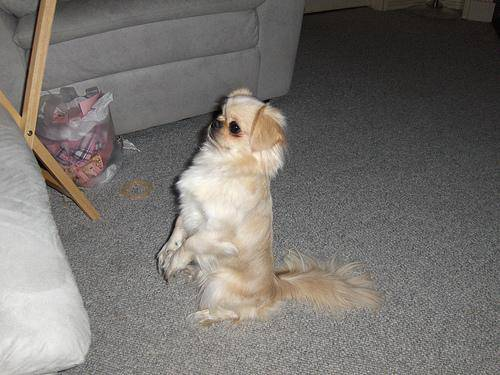

In [ ]:
 ## To view images

from IPython.display import Image 
Image("drive/MyDrive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg")

**Lets get all image file path names**

In [ ]:
filenames = ["drive/MyDrive/dog-breed-identification/train/" + id + ".jpg" for id in labels_csv["id"]]

In [ ]:
filenames[:10]

['drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
##lets check no. of filenames matches the no. of images in train folder or not

import os
if len(os.listdir("drive/MyDrive/dog-breed-identification/train/"))== len(filenames):
  print("Equal")
else:
  print("not equal")  


not equal


In [ ]:
len(os.listdir("drive/MyDrive/dog-breed-identification/train/"))


10252

In [ ]:

len(filenames)

10222

In [ ]:
filenames[1][45:]

'001513dfcb2ffafc82cccf4d8bbaba97.jpg'

In [ ]:
os.listdir("drive/MyDrive/dog-breed-identification/train/")[1]

'e7f6ec634384c07f7a0f5659e4f77867.jpg'

**Lets prepare our labels now**

In [ ]:
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
##lets check if no. of labels are equal to no. of filenames or not

if len(labels) == len(filenames):
  print("equal")
else:
  print("not equal")  

equal


In [ ]:
unique_labels = np.unique(labels)
len(unique_labels)

120

In [ ]:
labels[2] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:

## Lets convert labels to boolean arrays

boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## **Creating  validation set**

In [ ]:
X = filenames
y = boolean_labels


Lets start experimenting with 1000 images and then increase when needed

In [ ]:
NUM_IMAGES = 1000 #@param {type : "slider" , min : 1000, max : 10000 , step : 1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X[:NUM_IMAGES] ,
                                                      y[:NUM_IMAGES] ,
                                                      test_size = 0.2 ,
                                                     random_state = 42 )


In [ ]:
len(X_train) , len(X_val) , len(y_train) , len(y_val)

(800, 200, 800, 200)

## **Preprocessing Image , i.e; converting image into tensors**

In [ ]:
## Convert image into numpy arrays

from matplotlib.pyplot import imread
image = imread(filenames[25])
image.shape
image[:2]

array([[[158,  67,  84],
        [126,  50,  63],
        [121,  68,  74],
        ...,
        [220, 237, 245],
        [221, 238, 246],
        [222, 239, 247]],

       [[154,  63,  80],
        [134,  56,  70],
        [126,  71,  77],
        ...,
        [225, 242, 250],
        [226, 243, 251],
        [227, 244, 252]]], dtype=uint8)

In [ ]:
## converting image into tesnors

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[158,  67,  84],
        [126,  50,  63],
        [121,  68,  74],
        ...,
        [220, 237, 245],
        [221, 238, 246],
        [222, 239, 247]],

       [[154,  63,  80],
        [134,  56,  70],
        [126,  71,  77],
        ...,
        [225, 242, 250],
        [226, 243, 251],
        [227, 244, 252]]], dtype=uint8)>

In [ ]:
## Lets define a function to Preprocess images

IMG_SIZE = 224  ## defining size of image

def process_image(image_path , image_size = IMG_SIZE):

  ## Reading a image file
  image = tf.io.read_file(image_path)

  ## Converting image into tensors with 3 channels Red Green Blue
  image = tf.image.decode_jpeg(image , channels=3)

  ## Converting colour channels value range from 0 - 255 to 0-1
  image = tf.image.convert_image_dtype(image , tf.float32)

  ## Resize image
  image = tf.image.resize(image , size = [image_size , image_size])

  return image


In [ ]:
process_image(filenames[36])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.50953376, 0.6283628 , 0.7699237 ],
        [0.7407939 , 0.8362589 , 0.9173905 ],
        [0.565409  , 0.61991066, 0.643625  ],
        ...,
        [0.8859254 , 0.97232366, 0.9510614 ],
        [0.8578692 , 0.9399729 , 0.9459617 ],
        [0.8876426 , 0.97416997, 0.9879996 ]],

       [[0.6585053 , 0.750042  , 0.84112144],
        [0.2957565 , 0.36791164, 0.4503717 ],
        [0.5621985 , 0.60363233, 0.6173911 ],
        ...,
        [0.8928307 , 0.9672092 , 0.9515667 ],
        [0.9064481 , 0.9650833 , 0.9780014 ],
        [0.7855478 , 0.8393308 , 0.8613276 ]],

       [[0.6459047 , 0.7044271 , 0.8057326 ],
        [0.7966159 , 0.8405043 , 0.89730567],
        [0.84946096, 0.86925566, 0.87932795],
        ...,
        [0.9134395 , 0.9734973 , 0.96173257],
        [0.9379841 , 0.9669021 , 0.9715643 ],
        [0.7726158 , 0.7971606 , 0.81408113]],

       ...,

       [[0.49814808, 0.46601507, 0.28790423],
        [0.64

## Turning data into batches 

In [ ]:
## Define function which will return tuple (image , label)

def get_image_label(img_path , label):
  image = process_image(img_path)
  return (image , label)

In [ ]:

get_image_label(X[50] , y[50])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.6729392 , 0.6219588 , 0.547449  ],
         [0.59267706, 0.54169667, 0.4722289 ],
         [0.40833333, 0.35763302, 0.29124647],
         ...,
         [0.6371711 , 0.59487396, 0.5772073 ],
         [0.37234843, 0.32108787, 0.3356538 ],
         [0.29569826, 0.23390348, 0.27020824]],
 
        [[0.62960184, 0.57862145, 0.5041117 ],
         [0.5792618 , 0.5282814 , 0.45881355],
         [0.4457283 , 0.394998  , 0.32861143],
         ...,
         [0.7388204 , 0.69694334, 0.6766358 ],
         [0.33978537, 0.28894496, 0.29465732],
         [0.3101356 , 0.2514021 , 0.2754019 ]],
 
        [[0.54766905, 0.4966887 , 0.42217892],
         [0.5355943 , 0.4846139 , 0.4151461 ],
         [0.45908365, 0.40810326, 0.34171668],
         ...,
         [0.71725994, 0.6788844 , 0.6403696 ],
         [0.36564574, 0.3183067 , 0.31121394],
         [0.25731218, 0.19987914, 0.2067721 ]],
 
        ...,
 
        [[0.34024602, 0.28534406

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X , y = None , valid_data = False , test_data = False):
  if test_data :
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) ## for test data no need of labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
 
  elif valid_data :
    print("Creating valid data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  else:
    print("Creating train data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    
    data = data.shuffle(buffer_size = len(X))

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  return data_batch       

In [ ]:
train_data_batch = create_data_batches(X_train , y_train)
valid_data_batch = create_data_batches(X_val , y_val , valid_data =True)

Creating train data batches
Creating valid data batches


In [ ]:
train_data_batch.element_spec , valid_data_batch.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualising our Data batch

In [ ]:
import matplotlib.pyplot as plt

def plot_batch_25(images , labels):
  plt.figure(figsize = (15,15))
  for i in range(25):
    ax = plt.subplot(5 ,5 , i+1) #create subplots
    plt.imshow(images[i])  ## display images
    plt.title(unique_labels[labels[i].argmax()])  ## image title

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


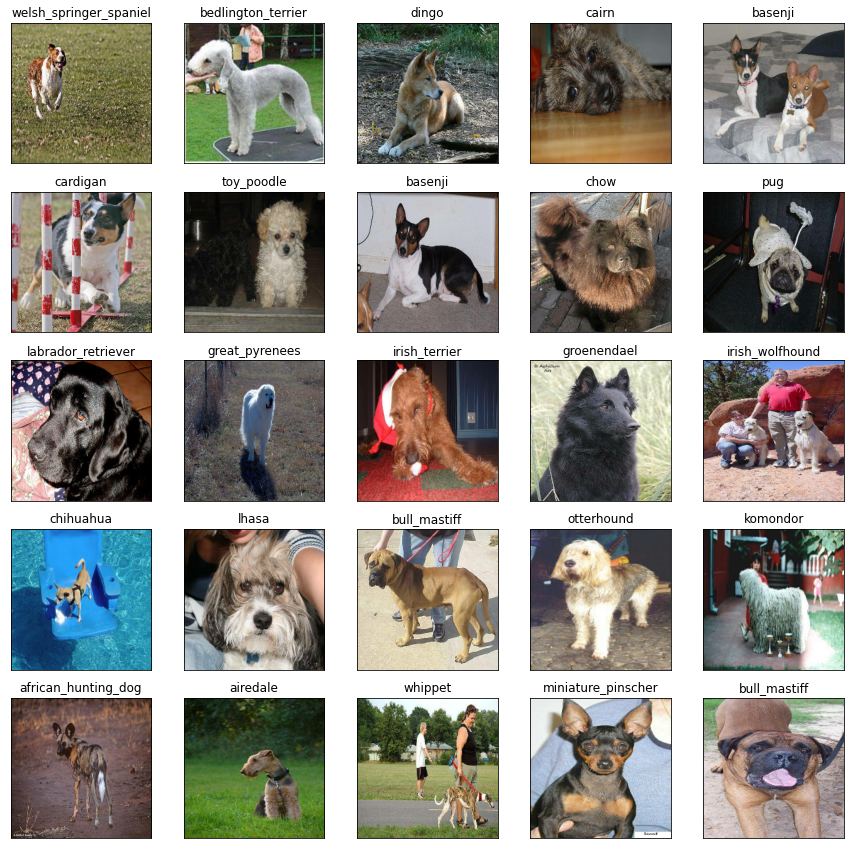

In [ ]:
train_images , train_labels = next(train_data_batch.as_numpy_iterator())
plot_batch_25(train_images , train_labels)

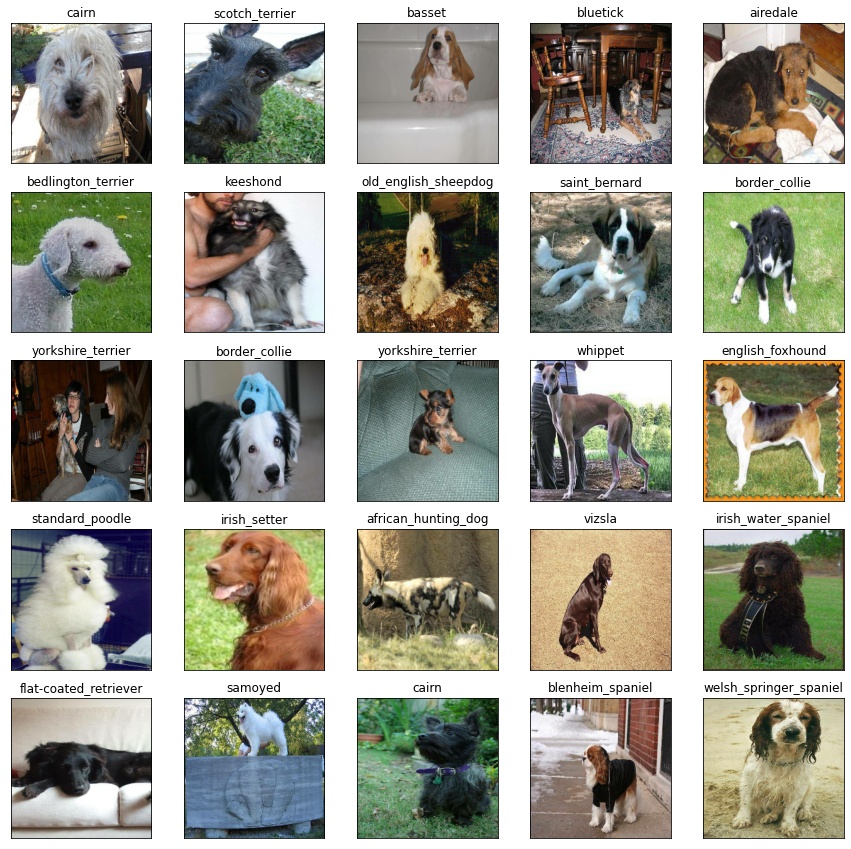

In [ ]:
valid_images , valid_labels = next(valid_data_batch.as_numpy_iterator())
plot_batch_25(valid_images , valid_labels)

# Building Model

In [ ]:
## input shape
INPUT_SHAPE = [None , 224 , 224 , 3]

## output shape
OUTPUT_SHAPE = len(unique_labels)

## model url
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
## create a function to create model using keras

def create_model(input_shape = INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL):
  ## create model instance
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url),
      tf.keras.layers.Dense(units = output_shape, 
                            activation = "softmax")
  ])

  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
                )
  
  model.build(INPUT_SHAPE)

  return model



In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Lets Define tensorboard callbacks(helper functions for our model)

In [ ]:
%reload_ext tensorboard

In [ ]:
import datetime

def create_tensorboard_callback():
  log_dir = os.path.join("drive/MyDrive/dog-breed-identification/logs" ,
                         datetime.datetime.now().strftime("%Y%m%d - %H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir = log_dir)

Early Stopping Callback to prevent our model from overfitting
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping 

In [ ]:
early_sopping_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                          patience = 3)

# Training our model

In [ ]:
NUM_EPOCHS = 100 #@param {type : "slider" , min : 10 , max :100 , step : 10}

In [ ]:
def train_model():
  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x = train_data_batch ,
            epochs = NUM_EPOCHS,
            callbacks = [tensorboard , early_sopping_callback],
            validation_data = valid_data_batch,
            validation_freq = 1 )
  return model

In [ ]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 336s 12s/step - loss: 4.5669 - accuracy: 0.1037 - val_loss: 3.4861 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 4s 173ms/step - loss: 1.6120 - accuracy: 0.7025 - val_loss: 2.1917 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 5s 190ms/step - loss: 0.5551 - accuracy: 0.9388 - val_loss: 1.6914 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 5s 189ms/step - loss: 0.2474 - accuracy: 0.9850 - val_loss: 1.5208 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 4s 175ms/step - loss: 0.1430 - accuracy: 0.9987 - val_loss: 1.4455 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 4s 173ms/step - loss: 0.1012 - accuracy: 0.9987 - val_loss: 1.4003 - val_accuracy: 0.6150
Epoch 7/100
25/25 [==============================] - 5s 180ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 1.3701 - val_accuracy: 0.6300

### using tesnorborad to visualise logs

In [ ]:
%tensorboard --logdir drive/MyDrive/dog\-breed\-identification/logs

<IPython.core.display.Javascript object>

## Making Predictions and visualising them

In [ ]:
predictions = model.predict(valid_data_batch , verbose = 1)

7/7 [==============================] - 2s 151ms/step


In [ ]:
predictions

array([[9.0622138e-03, 1.5662139e-04, 6.5183808e-04, ..., 1.1604091e-04,
        7.0525886e-05, 1.9298844e-03],
       [1.3161831e-03, 2.5995975e-04, 1.3737486e-02, ..., 7.5214711e-04,
        8.8091445e-04, 1.4342937e-04],
       [5.1368861e-05, 1.6129867e-05, 2.4938794e-05, ..., 3.7721944e-05,
        1.9378391e-05, 2.6441933e-04],
       ...,
       [1.3837202e-06, 5.8979131e-05, 3.5035308e-05, ..., 1.8693241e-06,
        4.0664256e-04, 4.4541317e-05],
       [1.4224736e-03, 6.4574138e-05, 1.8311803e-05, ..., 1.8690317e-04,
        2.5669879e-05, 1.3956410e-03],
       [6.5999757e-04, 1.4958011e-04, 1.1628628e-03, ..., 1.4062448e-03,
        2.6163849e-04, 9.3046881e-05]], dtype=float32)

In [ ]:
def get_prediction_label(prediction):

  return (unique_labels[np.argmax(prediction)])

In [ ]:
get_prediction_label(predictions[0])


'border_terrier'

In [ ]:
## unbatch valid data to compare the truth labels(valid data labels) to the predicted labels

def unbatch_data(tf_data):
  images_ = []
  labels_ = []

  for image , label in tf_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(label)

  return (images_ , labels_)

                                                      

In [ ]:
val_images , val_labels = unbatch_data(valid_data_batch)


In [ ]:
## visualise our predictions , labels and image
def visualise_prediction(predictions , label , image , i = 0):

  """
  predictions : predictions array ,
  label : true lables array ,
  image : true images array ,
  i : index  
  """

  predicted_label = get_prediction_label(predictions[i])
  true_label = unique_labels[np.argmax(label[i])] 
  predcition_probability = np.max(predictions[i])*100

  plt.imshow(image[i])
  plt.xticks([])
  plt.yticks([])

  if predicted_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f} {}".format(predicted_label , 
                                 predcition_probability,
                                 true_label),
                                 color = color )
  

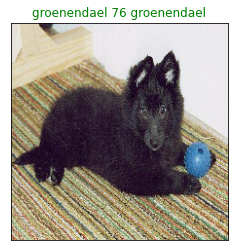

In [ ]:
visualise_prediction(predictions , val_labels , val_images , i = 77 )

In [ ]:
## Lets get top 10 probalities of prediction , their incides and their labels

def top_10_predProbs(predictions ,vallabels ,  i = 0):
  indexes = predictions[i].argsort()[-10:][::-1]
  top_10_probabilities  = predictions[i][indexes]
  labels = unique_labels[indexes]

  true_label = unique_labels[vallabels[i]]
  

  plot = plt.bar(np.arange(len(labels)),
                 top_10_probabilities,
                 color = "grey")
  plt.xticks(np.arange(len(labels)),
             labels = labels,
             rotation = "vertical")
  
  if np.isin(true_label , labels):   ## check if true label is in labels
    plot[np.argmax(labels == true_label)].set_color("green")
  else:
    pass  




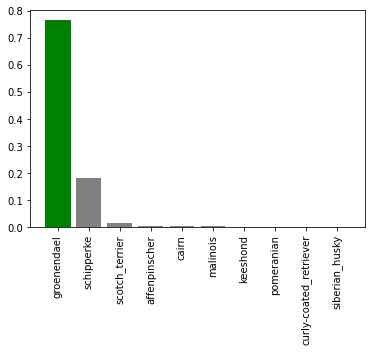

In [ ]:
top_10_predProbs(predictions , val_labels, i = 77)

In [ ]:
#lets visualise both plots

def visualise_prediction_evaluate(numImages = 6 , numRows = 3 , numCols = 2):
  
  plt.figure(figsize=(10*numCols , 5*numRows))

  for n in range(numImages):
    plt.subplot( numRows , 2*numCols , 2*n +1  )
    visualise_prediction(predictions ,
                         val_labels ,
                         val_images ,
                         i = n )
    
    plt.subplot(numRows , 2*numCols, 2*n+2)
    top_10_predProbs(predictions = predictions,
                     vallabels = val_labels,
                     i = n)
  plt.tight_layout(h_pad=1.0)
  plt.show()

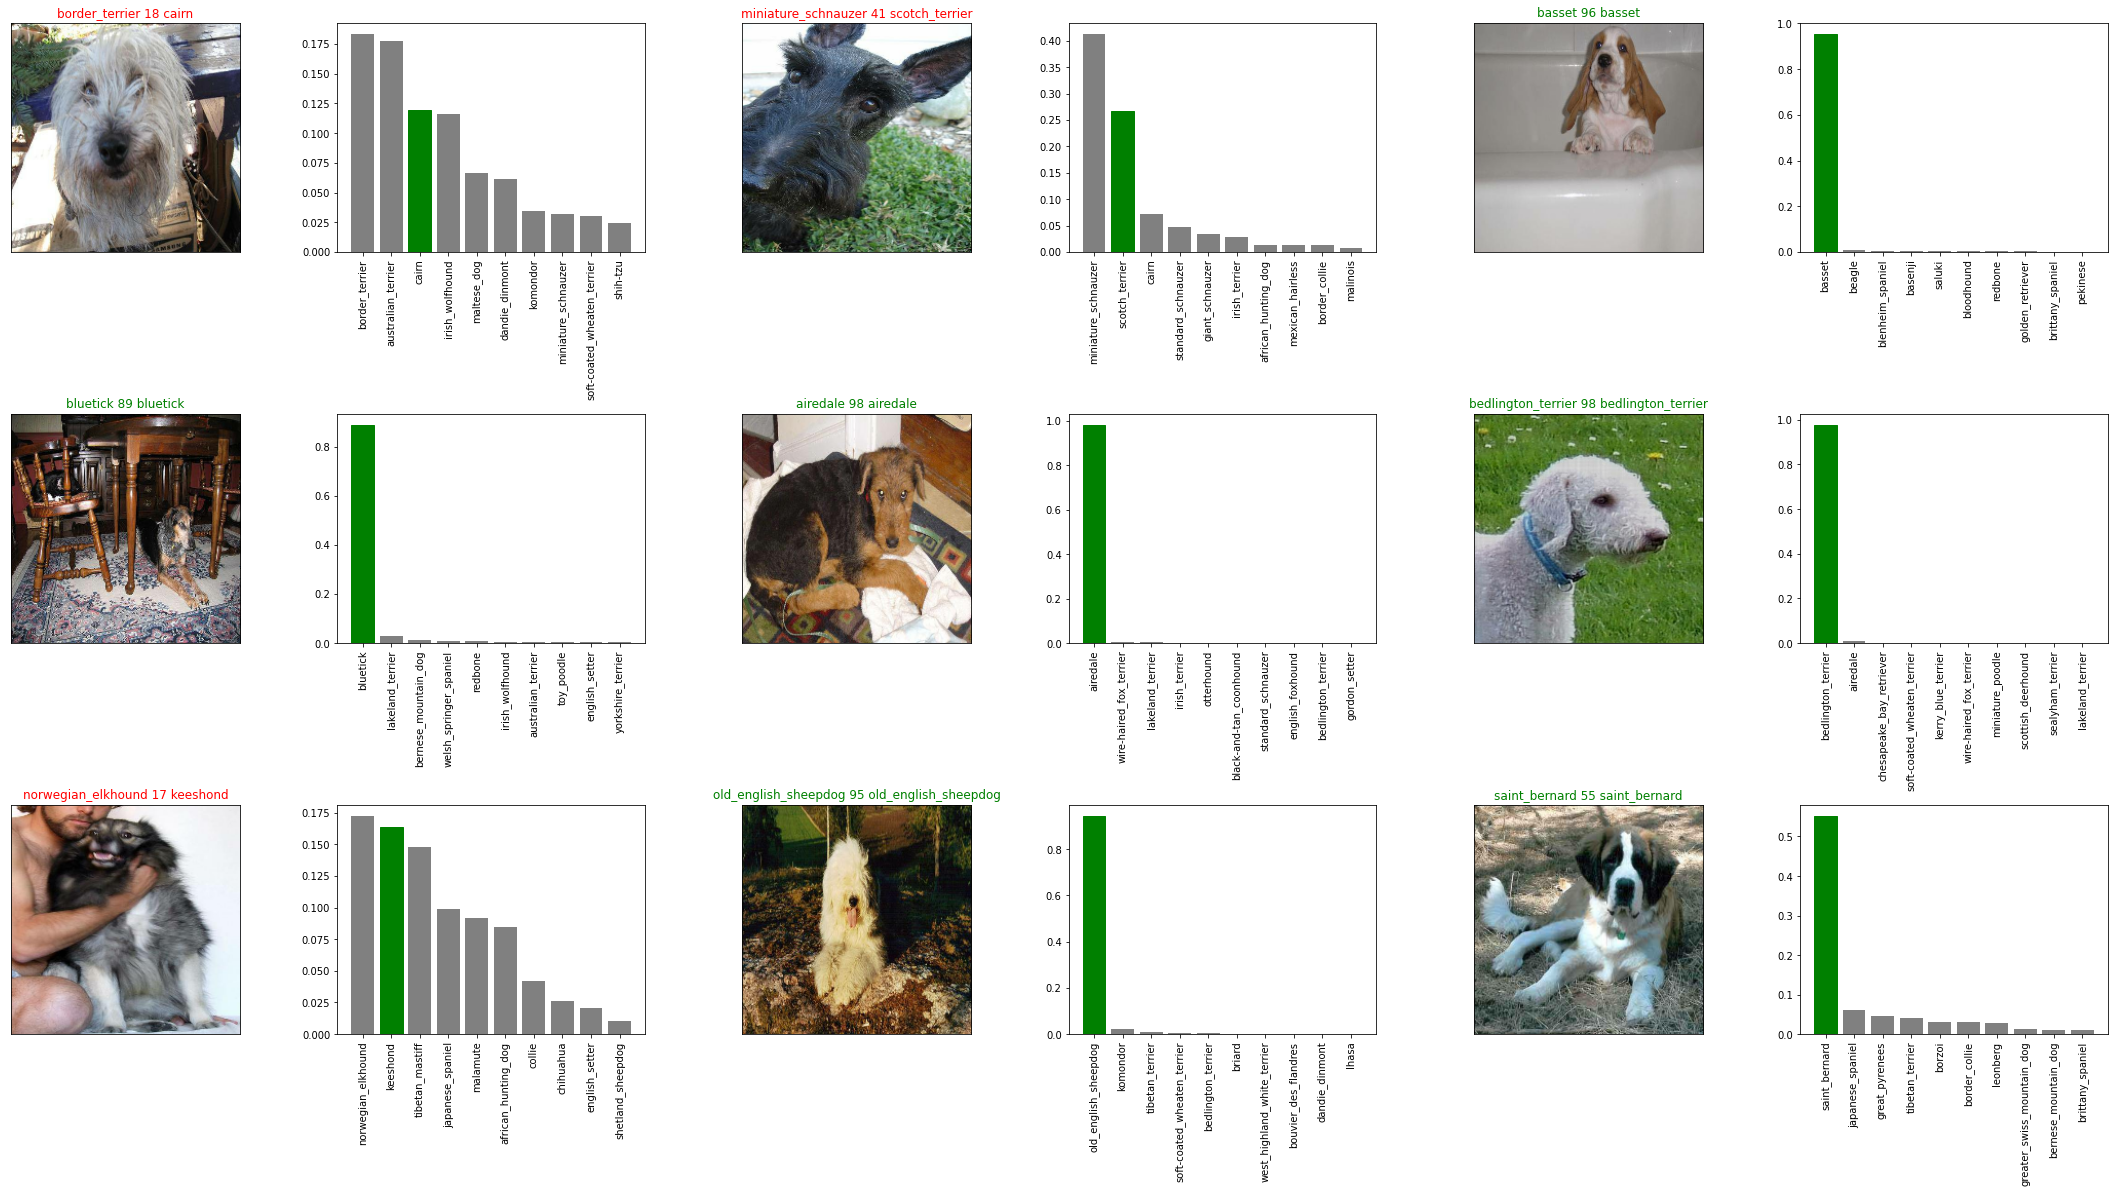

In [ ]:
visualise_prediction_evaluate(numImages=9 , numRows = 4 , numCols=3)

# Save and load our Model

In [ ]:
def save_model(model , suffix):
  model_dir = os.path.join("drive/MyDrive/dog-breed-identification/models",
                           datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  model_path = model_dir + "-" + suffix + ".h5"

  model.save(model_path)

  return model_path

In [ ]:
save_model(model , "200-Samples")

'drive/MyDrive/dog-breed-identification/models/20211112-06461636699563-200-Samples.h5'

In [ ]:
def load_model(model_path):
  model = tf.keras.models.load_model(model_path , 
                             custom_objects = {"KerasLayer" : hub.KerasLayer})
  
  return model

In [ ]:
first_1000img_model = load_model('drive/MyDrive/dog-breed-identification/models/20211108-10451636368340-200-Samples.h5')

In [ ]:
first_1000img_model.evaluate(valid_data_batch)

7/7 [==============================] - 2s 132ms/step - loss: 1.2618 - accuracy: 0.6650


[1.261763334274292, 0.6650000214576721]

In [ ]:
model.evaluate(valid_data_batch)

7/7 [==============================] - 1s 132ms/step - loss: 1.2708 - accuracy: 0.6300


[1.2708427906036377, 0.6299999952316284]